In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from myst_nb import glue

## Exact Distribution of a Sum ##

We already know how to find the distribution of the sum of any two discrete random variables. 

$$
P(X+Y = k) = \sum_j P(X=j, Y=k-j)
$$

If $X$ and $Y$ are independent, this simplifies to become the *discrete convolution formula*:

$$
P(X+Y = k) = \sum_j P(X=j)P(Y=k-j)
$$

By induction, we can extend this to the sum of any finite number of independent variables. 

So in principle, we know how to find the distribution of the sum of $n$ independent random variables for $n > 1$. However, this method can be hard to put into practice for large $n$. 

In this section we examine another way of approaching the problem of finding the distribution of a sum. It is an abstract mathematical approach that is also easier to automate, though it too comes up against computational barriers eventually.

```{admonition} Quick Check
$X_1$ and $X_2$ are i.i.d. with distribution given by $P(X_1 = i) = p_i$ for $1 \le i \le 3$ and $\sum_{i=1}^3 p_i = 1$. Find the distribution of $S = X_1+X_2$.

```

```{admonition} Answer
:class: dropdown
$P(S=2) = p_1^2$, $P(S=3) = 2p_1p_2$, $P(S=4) = p_2^2 + 2p_1p_3$, $P(S=5) = 2p_2p_3$, $P(S=6)=p_3^2$

```

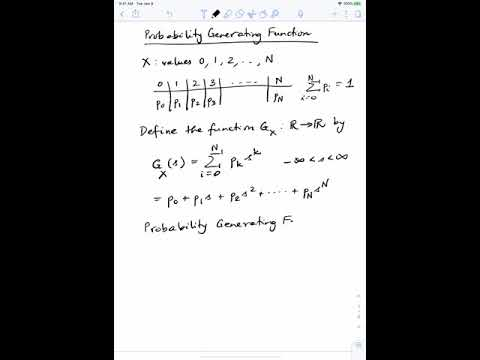

In [2]:
# VIDEO: Probability Generating Function
from IPython.display import YouTubeVideo

vid_pgf = YouTubeVideo('Z1TU6n3ZdSg')
glue("vid_pgf", vid_pgf)

```{dropdown} See More
:icon: video
{glue:}`vid_pgf`
```

### Probability Generating Function (PGF) ###

Let $X$ be a random variable with possible values $0, 1, 2, \ldots, N$ for some fixed integer $N$. For brevity, let $p_k = P(X = k)$ for $k$ in the range 0 through $N$.

Define the *probability generating function* (pgf) of $X$ as

$$
G_X(s) ~  = ~ \sum_{k=0}^N p_ks^k, ~~~ -\infty < s < \infty
$$

**Technical Note:** We have defined the probability generating function for random variables that have finitely many non-negative integer values. The definition can be extended to random variables that have infinitely many non-negative integer values. But in that case the pgf is an infinite series and we have to be careful about convergence. Typically the pgf is defined only on the domain $\vert s \vert \le 1$ so that it converges.

The definition above says that for any $s$,

$$
G_X(s) ~ = ~ p_0 + p_1s + p_2s^2 + p_3s^3 + \cdots + p_Ns^N
$$

You can see that $G_X$ is a polynomial of degree $N$, and that the coefficient of $s^k$ is $p_k = P(X=k)$.

So if you were given the pgf of a random variable, you could read off the distribution of the random variable by simply listing all the powers and the corresponding coefficients: 

- The powers are the possible values.
- The coefficients are the corresponding probabilities.

Hence $G_X(1) = 1$.

### PGF of the Sum of Independent Random Variables ###

To see how the pgf helps us find the distribution of a sum, observe that for every $s$, the value $G_X(s)$ is an expectation:

$$
G_X(s) ~ = ~ \sum_{k=0}^N s^kP(X=k) ~ = ~ E(s^X)
$$

Therefore, if $X$ and $Y$ are independent non-negative integer valued random variables, then for every $s$,

$$
G_{X+Y}(s) ~ = ~ E(s^{X+Y}) ~ = ~ E(s^X s^Y) ~ = ~ E(s^X)E(s^Y)
~ = ~ G_X(s)G_Y(s)
$$

We have used the fact that for the independent random variables $s^X$ and $s^Y$, the expectation of the product is the product of the expectations. 

The result says that the pgf of the sum of two independent random variables is the product of the two pgfs. This extends easily to more than two random variables and yields a simple formula for the pgf of the sum of i.i.d. variables.

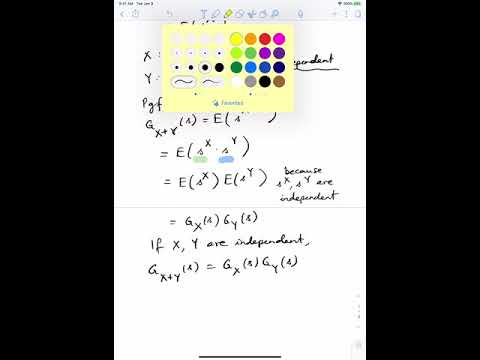

In [3]:
# VIDEO: PGF of a Sum
vid_pgf_sum = YouTubeVideo('86C9pL8lg1U')
glue("vid_pgf_sum", vid_pgf_sum)

```{dropdown} See More
:icon: video
{glue:}`vid_pgf_sum`
```

### PGF of the Sum of an IID Sample ###
Let $X_1, X_2, \ldots, X_n$ be i.i.d. random variables with possible values $0, 1, 2, \ldots, N$. Let $S_n = X_1 + X_2 + \cdots + X_n$. Then the probability generating function of $S_n$ is

$$
G_{S_n}(s) ~ = ~ \big{(}G_{X_1}(s)\big{)}^n, ~~~ -\infty < s < \infty
$$

Because $G_{X_1}$ is a polynomial of degree $N$, $G_{S_n}$ is a polynomial of degree $nN$. As with any pgf, the coefficient of $s^k$ is the chance of $k$. That is, for every $k$ in the range 0 through $nN$,

$$
P(S_n = k) = \text{coefficient of } s^k \text{ in } G_{S_n}(s)
$$

We now have an algorithm for finding the distribution of $S_n$.

- Start with the pgf of $X_1$.
- Raise it to the power $n$. That's the pgf of $S_n$.
- Read the distribution of $S_n$ off the pgf.

Wonderful! We're done! Except that actually doing this involves raising a polynomial to a power. That is a daunting task if the power is large.

Fortunately, as you will see in the next section, `NumPy` comes to our rescue with a set of polynomial methods.